In [130]:
%cd drive/MyDrive/Colab\ Notebooks/DL-NN

[Errno 2] No such file or directory: 'drive/MyDrive/Colab Notebooks/DL-NN'
/Users/altayavci/Documents/DataScience/DL-NN/sentdex


In [131]:
!ls

MNIST             intro.ipynb       net_flatten.ipynb utils.ipynb
PetImages         model.log         training_data.npy


**TRAIN-DATASET-TETS DİYE AYIRMAN LAZIM**

**Part1: _Introduction_**

In [132]:
import torch

In [133]:
x=torch.Tensor([5,3])
y=torch.Tensor([2,1])
z=torch.zeros([2,5])
g=torch.rand([2,5])
#torch ekosisteminde tensörler, arrayleri temsil ediyor
#zaten tensor dediğin şeyde matrisin uzaydaki hali 
#zeros ve rand numpy ile aynı 

In [134]:
g.view([1,10])
g.reshape(1,-1)
#flatlemek için için view(),reshape() ve flatten()

tensor([[0.1605, 0.5646, 0.6143, 0.8712, 0.4297, 0.0878, 0.0370, 0.6119, 0.0484,
         0.4299]])

**Part2: _Data Preperation with MNIST_**

In [135]:
import torchvision
from torchvision import transforms,datasets

In [136]:
train=datasets.MNIST('',train=True,download=True,
                     transform=transforms.Compose([transforms.ToTensor()]))
#''==path aslında,localde olsun istedik ondan boş string yolladık
test=datasets.MNIST('',train=False,download=True,
                     transform=transforms.Compose([transforms.ToTensor()]))

In [137]:
trainset=torch.utils.data.DataLoader(train,batch_size=10,shuffle=True)
testset=torch.utils.data.DataLoader(test,batch_size=10,shuffle=True)
#trainset ve testset generator olarak geliyor 

In [138]:
for data in trainset:
    print(data)
    break
#batch_size=10 dediğimiz için bir iterasyonda 10 adet tensor olacaktır.

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [139]:
x,y=data[0][0],data[1][0]
#y=tensor[0] olacak yani 9, x de 9un tensoru olacak

In [140]:
import matplotlib.pyplot as plt 

In [141]:
x.shape #bir grid oluşturuyor : 1row, 1 x-y column, bir x-z column

torch.Size([1, 28, 28])

(<matplotlib.image.AxesImage at 0x7fd89c1828e0>, tensor(0))

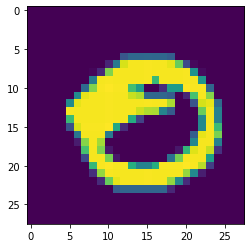

In [142]:
plt.imshow(x.view(28,28)),data[1][0]

(<matplotlib.image.AxesImage at 0x7fd87aa36310>, tensor(1))

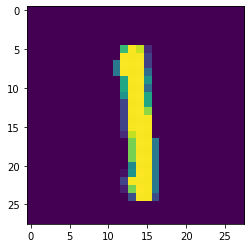

In [143]:
plt.imshow(data[0][1].view(28,28)),data[1][1]

In [144]:
total=0
counterDict={0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}

for data in trainset :
    xs,ys=data
    for y in ys :
        counterDict[int(y)]+=1
        total+=1

print(counterDict)
#bu işlemi hangi rakam ne kadar var diye yaptık

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [145]:
total

60000

In [146]:
for i in counterDict:
      print(f'{i}:{counterDict[i]/total*100}')
#burda da verisetindeki dağılımı görmek için yaptık

0:9.871666666666666
1:11.236666666666666
2:9.93
3:10.218333333333334
4:9.736666666666666
5:9.035
6:9.863333333333333
7:10.441666666666666
8:9.751666666666667
9:9.915000000000001


<BarContainer object of 10 artists>

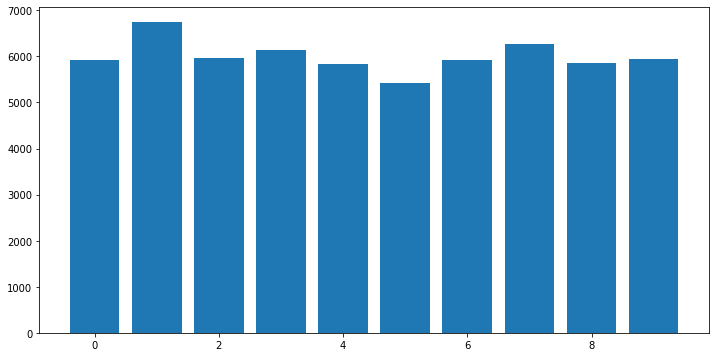

In [147]:
plt.figure(figsize=(12,6))
plt.bar(counterDict.keys(),counterDict.values())

**Part3: _Building Neural Network_**

In [148]:
import torch.nn as nn
import torch.nn.functional as F
#torch.nn OOP, functional da fonksiyonel=>parametre ile çalışır 

In [149]:
class Net(nn.Module):

    def __init__(self):
        super().__init__() #nn.Module'ü inherit ettik
        self.fc1=nn.Linear(28*28,64) #input layer
        #fully-connected nn 
        #28*28 olmasının sebebi de elimizdeki görüntülerin boyutu
        #Linear nn yarattık, conv olsa conv derdik 
        self.fc2=nn.Linear(64,64) #hidden-layer , inputu fc1'outputu olmalı
        self.fc3=nn.Linear(64,64) #hidden-layer
        self.fc4=nn.Linear(64,10) #output-layer, output=10 olmasının sebebi verisetinde 10 classımızın olması 

    def forward(self,x): #feed-forward
        x=F.relu(self.fc1(x)) #activation function relu 
        x=F.relu(self.fc2(x))
        x=F.relu(self.fc3(x)) 
        x=self.fc4(x)

        return F.log_softmax(x,dim=1) #output-layerda sofmax kullandık,output layerdaki probabiltic sonuclar sebebiyle
        #dim==axis, dim=1 : row-vise
    
net=Net()
print(net)


Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [150]:
X=torch.rand((28,28))
X=X.view(-1,28*28) #-1'i vermemizin reshape(-1,1) mantıgı aslında 

In [151]:
output=net(X)

In [152]:
output

tensor([[-2.3360, -2.3416, -2.3532, -2.3655, -2.4304, -2.2914, -2.0920, -2.4016,
         -2.1940, -2.2680]], grad_fn=<LogSoftmaxBackward0>)

**Part4: _Training Model_**

In [153]:
import torch.optim as optim

In [154]:
optimizer=optim.Adam(net.parameters(),lr=0.001)
#net.parameters() transfer-learning'te kullanılır,adjustable
epochs=3
for epoch in range(epochs):
    net.train()
    for data in trainset:
        X,y=data
        #data is a batch of the features and labels 

        net.zero_grad()
        #nn'e datayı vermeden önce bunu yapp !!
        #memory yi iyileştiriyor,gradientleri sıfırlıyor

        output=net(X.view(-1,28*28))
        loss=F.nll_loss(output,y) 
        #output ve y skaler sayı olup vektör olmadıgından nll_loss kullan 
        #the negative log likelihood loss , yerine cross entropy de kullanılabilir

        loss.backward()
        #back propagation 

        optimizer.step()
    print(loss)
    


tensor(0.0105, grad_fn=<NllLossBackward0>)
tensor(0.1589, grad_fn=<NllLossBackward0>)
tensor(0.0157, grad_fn=<NllLossBackward0>)


In [155]:
correct=0
total=0

net.eval()
with torch.no_grad(): #gradientlere bakmadan 
    for data in trainset:
        X,y=data
        output=net(X.view(-1,28*28))
        for idx,i in enumerate(output):
            if torch.argmax(i)==y[idx]:
            #output-layerdaki max arguman , y[idx]'e eşitse doğru iş yapılmış 
                correct+=1
            total+=1

print(f'Accuracy : {round(correct/total,3)}')

Accuracy : 0.978


In [156]:
net(X[0].view(-1,28*28)).shape #row matris

torch.Size([1, 10])

In [159]:
net(X[0].view(-1,28*28)) #burdaki en büyük argüman -1.1264e-03 , 6. indeks

tensor([[-1.2177e+01, -2.2377e+01, -2.1796e+01, -2.1766e+01, -1.4412e+01,
         -1.5381e+01, -5.9604e-06, -2.4709e+01, -1.6464e+01, -2.5646e+01]],
       grad_fn=<LogSoftmaxBackward0>)

In [160]:
torch.argmax(net(X[0].view(-1,28*28)))

tensor(6)

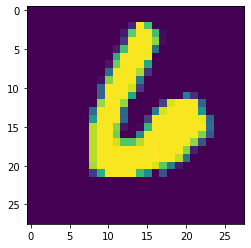

predict:6


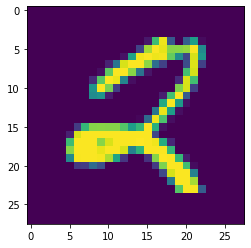

predict:2


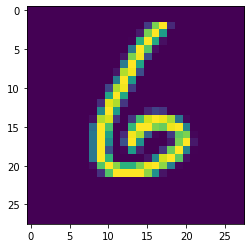

predict:6


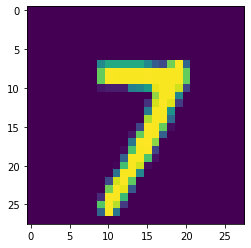

predict:7


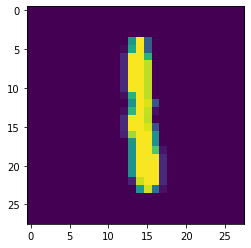

predict:1


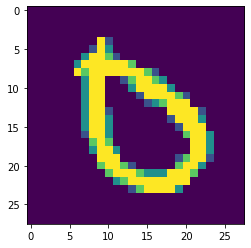

predict:0


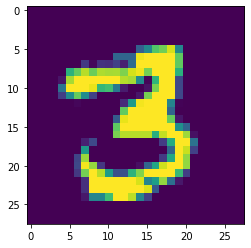

predict:3


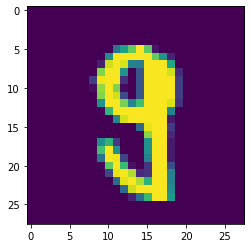

predict:9


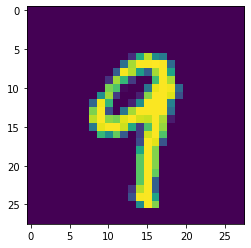

predict:9


In [162]:
for i in range(9):
    #not : X bünyesinde 10 tensor barındırıyor
    plt.imshow(X[i].view(28,28))
    plt.show()
    print(f'predict:{torch.argmax(net(X[i].view(-1,28*28)))}')
    #data'nın X[i] batch'indaki 28*28 tensoru,
    #eğitilmiş nn, torch objesinin argmax() methodu ile görüntüdeki sayıyı tahmin edip söylüyor
    #net(X)'ten çıkan 


**Part5: _Convnet Intro_**

In [163]:
import os 
import cv2 
import numpy as np
from tqdm.notebook import tqdm

In [164]:
REBUILD_DATA=True

In [165]:
class DogsVSCats():

    IMG_SIZE=50
    CATS='PetImages/Cat'
    DOGS='PetImages/Dog'
    LABELS={CATS :0,DOGS:1} 
    #CATS ve DOGS'ta görüntüler olacak 
    trainingData=[]
    catCount,dogCount=0,0

    def makeTrainingData(self):
        for label in self.LABELS:
            print(label)
            #label burda 
            for f in tqdm(os.listdir(label)): 

                try :
                      #tdqm progress bar 
                      #os.listdir()'de dosyanın içinde ne var onu söyler, 
                      #label=CATS olursa CATS'ın içindeki görüntü f'e atanır 

                    path=os.path.join(label,f)
                    #join() ,iki farklı path'i birleştirip tek path oluşturur
                    #örn: label='Users/Desktop',f='bla.txt' =>Users/Desktop/bla.txt 

                    img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
                    #yukarıda tanımlanan path'ten okuyacak, gri şekilde 2 boyutlu
                    #renk tanımlanmak istenirse üçüncü boyut olarak girilmeli 
                    #gray_scale, nn'i de küçültüyor 
        
                    img=cv2.resize(img,(self.IMG_SIZE,self.IMG_SIZE))
                    self.trainingData.append([np.array(img),np.eye(2)[self.LABELS[label]]])
                    #np.eye(2) : 2x2 birim matris
                    #self.LABELS[label] : 0 veya 1 i vericek
                    #np.eye(2)[0] : [1 0] ,np.eye(2)[1] : [0 1] olucak 

                    if label==self.CATS:
                        self.catCount+=1
                    elif label==self.DOGS:
                        self.dogCount+=1 
                    #köpek ve kedilerin sayısının birbirlerine eşit olması lazım, homojen dağılım
                except Exception as e :
                        pass 

        np.random.shuffle(self.trainingData)  
        np.save('training_data.npy',self.trainingData)
        print(f'Cats : {self.catCount}')
        print(f'Cats : {self.dogCount}')


if REBUILD_DATA:
    
    dogsvscats=DogsVSCats()
    dogsvscats.makeTrainingData()



PetImages/Cat


  0%|          | 0/12501 [00:00<?, ?it/s]

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


PetImages/Dog


  0%|          | 0/12501 [00:00<?, ?it/s]

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2230 extraneous bytes before marker 0xd9
Corrupt JPEG data: 254 extraneous bytes before marker 0xd9
Corrupt JPEG data: 399 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


Cats : 12476
Cats : 12470


In [166]:
import numpy as np

In [167]:
training_data=np.load('training_data.npy',allow_pickle=True)
print(len(training_data))

24946


In [168]:
import matplotlib.pyplot as plt

In [169]:
training_data[1][1] #köpek 1

array([0., 1.])

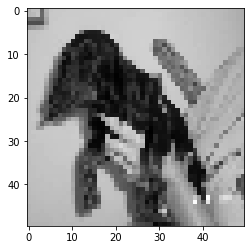

In [170]:
plt.imshow(training_data[1][0],cmap='gray') ##nn'in gördüğü görüntü
plt.show()

In [171]:
training_data[10][1] #kedi 0

array([1., 0.])

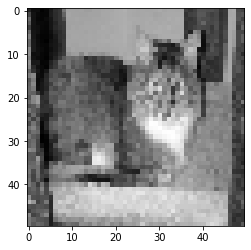

In [172]:
plt.imshow(training_data[10][0],cmap='gray') ##nn'in gördüğü görüntü
plt.show()

**Part6: _Training_**

In [173]:
import torch 
import torch.nn as nn 
import torch.nn.functional as F

In [200]:
class Net(nn.Module): #Dropout ekle 
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(1,32,5)
        #2 boyutlu, 32 conv. featurlı ,5x5 kernel yani windowlu ilk layer
        self.conv2=nn.Conv2d(32,64,5)
        self.conv3=nn.Conv2d(64,128,5)
        
        x=torch.randn(50,50).view(-1,1,50,50)
        #50x50 tensor formu , 1'de conv1'den gelen 1 
        
        self.to_linear=None
        self.convs(x)
        
        self.fc1=nn.Linear(self.to_linear,512) #input bilinmiyor ,output 512
        self.fc2=nn.Linear(512,2) #input, bir önceki fully-connected layerın outputu, outputu ise class sayısı
        
        #fc1'deki inputu ilk başta bilemeyiz bu yüzden :
        #ilk başta random data verip convlardan çıkan outputu tespit etmeliyiz
        #çıkan outputu sonrasında fc1'e girmeliyiz(self.to_linear)
        
    def convs(self,x):
        x=F.max_pool2d(F.relu(self.conv1(x)),(2,2))
        x=F.max_pool2d(F.relu(self.conv2(x)),(2,2))
        x=F.max_pool2d(F.relu(self.conv3(x)),(2,2))
        
        #print(x[0].shape)
        if self.to_linear is None :
            self.to_linear=x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
            #shape i öğrenmek için 
            
        return x 
    
    def forward(self,x):
        x=self.convs(x)
        x=x.view(-1,self.to_linear)
        #to_linear ile input shape'ini öğrendik, şimdi de flatten yaptık 
        x=F.relu(self.fc1(x))
        x=self.fc2(x)
        
        return F.softmax(x,dim=1) 
        
    
net=Net()   

In [175]:
import torch.optim as optim
from tqdm.notebook import tqdm

In [176]:
X=torch.Tensor([i[0] for i in training_data]).view(-1,50,50)
X=X/255.0 
#normalize ediyoruz 255 olmasının sebebi RGB formatı
y=np.array([i[1] for i in training_data])
y=torch.Tensor(y)
VAL_PCT=0.1
val_size=int(len(X)*VAL_PCT)
print(val_size)
#validation test size 

2494


In [177]:
train_X=X[:-val_size]
train_y=y[:-val_size]

test_X=X[-val_size:]
test_y=y[-val_size:]

print(len(train_X))
print(len(test_X))

22452
2494


**Part7: _Run on GPU_**

In [178]:
import torch 

In [179]:
torch.cuda.is_available()

False

In [180]:
torch.backends.mps.is_available()

True

In [181]:
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    print('running on mps')
else :
    mps_device=torc.device('cpu')
    print('running on cpu')

#conda env config vars set PYTORCH_ENABLE_MPS_FALLBACK=1
#conda activate <test-env>

running on mps


In [182]:
#device=torch.device('cuda:0')
#Normalde böyle yaparız fakat m1 işlemcide cuda sorunlu 

In [183]:
net.to(mps_device)
#olabildiğince az to() kullanmaya çalış 

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=512, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=2, bias=True)
)

In [184]:
net=Net().to(mps_device)

In [185]:
#TRAIN 

In [186]:
def train(net):
    optimizer=optim.Adam(net.parameters(),lr=0.001)
    loss_function=nn.MSELoss()
    
    BATCH_SIZE=100
    #memory error alırsan batch_size'i düşür !
    EPOCHS=3

    for epoch in range(EPOCHS): 
        for i in tqdm(range(0,len(train_X),BATCH_SIZE)): #DATALOADER'A GEÇ !!
            #print(i,i+BATCH_SIZE)
            #0->100 indeks : birinci batch
            #100->200 indeks :ikinci batch
            batch_X=train_X[i:i+BATCH_SIZE].view(-1,1,50,50)
            batch_y=train_y[i:i+BATCH_SIZE]
            batch_X,batch_y=batch_X.to(mps_device),batch_y.to(mps_device)
            #to device yaparak , batchleri gpuya aktardık
        
            net.zero_grad() #eğer bir büyük modelde iki farklı nn var ise ve bunların optimizerları farklı ise optimizer.zero_grad() kullan
            
            outputs=net(batch_X)
            loss=loss_function(outputs,batch_y)
            loss.backward()
            optimizer.step() #update eder 
            
        print(f'epoch: {epoch} loss:{loss}')

In [187]:
train(net)
#dataseti gpu'ye yüklemek pek mantıklı değil
#bu yüzden dataseti genelde cpu'da tut,batch_size'ı arttır, batchleri gpuya gönder 

  0%|          | 0/225 [00:00<?, ?it/s]

epoch: 0 loss:0.20677581429481506


  0%|          | 0/225 [00:00<?, ?it/s]

epoch: 1 loss:0.1857486367225647


  0%|          | 0/225 [00:00<?, ?it/s]

epoch: 2 loss:0.15266400575637817


In [188]:
def test(net):
    correct,total=0,0
    global preds,reals
    preds, reals = [],[]
    with torch.no_grad(): 
        #gradientleri gpudan almaz, zaten torch.backward() yapıyoruz 
        for i in tqdm(range(len(test_X))):
            real_class=torch.argmax(test_y[i]).to(mps_device)
            net_out=net(test_X[i].view(-1,1,50,50).to(mps_device)[0])
            #real ve net_out'u da gpu objesi yaptık
            pred_class=torch.argmax(net_out)
            preds.append(pred_class.to('cpu').detach().numpy())
            reals.append(real_class.to('cpu').detach().numpy())
            if pred_class==real_class:
                correct+=1
            total+=1
            
    print(f'Accuracy :{round(correct/total,3)}')

In [189]:
test(net)

  0%|          | 0/2494 [00:00<?, ?it/s]

Accuracy :0.741


In [190]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

<AxesSubplot:>

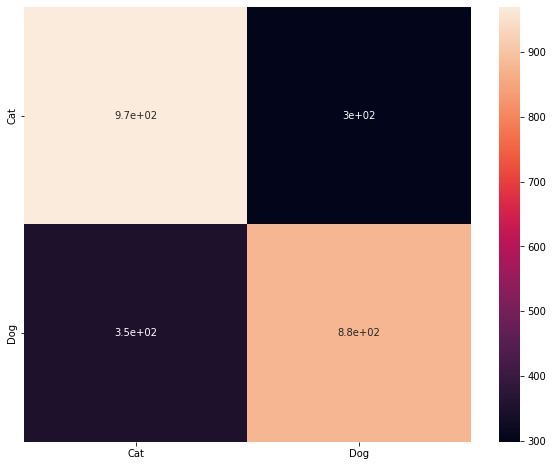

In [191]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(reals,preds),annot=True,xticklabels=['Cat','Dog'],yticklabels=['Cat','Dog'])


**Part8: _Model Analysis_**

In [192]:
def fwd_pass(X,y,train=False):
    #forward-pass
    if train:
        net.zero_grad()
        #gradientleri sıfırla 
        #bunun yapılmasının sebebi bir sonraki satırda zaten yine weightler yani gradler oluşcak
        
    outputs=net(X)
    mathces=[torch.argmax(i)==torch.argmax(j) for i,j in zip(outputs,y)]
    acc=mathces.count(True)/len(mathces)
    loss_function=nn.MSELoss()
    loss=loss_function(outputs,y)
    
    if train :
        loss.backward()
        #back-prapagation 
        optimizer.step()
        
    return acc,loss
    
      

In [193]:
def test(size=32):
    #size = batch_size
    random_start=np.random.randint(len(test_X)-32)
    #örnek : test-size 1000 olsun, 0-1000 arasında random bi sayı secicek
    val_X,val_y=test_X[random_start:random_start+size],test_y[random_start:random_start+size]
    #validasyon seti , test setinin bir parçası olmalı. Train olursa overfit edebilir 
    with torch.no_grad():
        val_acc,val_loss=fwd_pass(val_X.view(-1,1,50,50).to(mps_device),val_y.to(mps_device))
        #batch_train lerle eğitilmis neural networku , batch_testlerle  forward ederek (weight ve biasleri validasyon setiyle test ediyoruz zaten train=False flagından dolayı da zero_grad() olmuyor),
        #validation accuracy ve validation lossu bulmus oluyoruz.
    
    return val_acc,val_loss


In [197]:
val_acc,val_loss=test(size=32)
print(f'validation accuracy: {val_acc} validation loss:{val_loss}')

validation accuracy: 0.78125 validation loss:0.13558876514434814


In [198]:
import time 

MODEL_NAME=f'model-{int(time.time())}'

In [199]:
print(MODEL_NAME)
net=Net().to(mps_device)
optimizer=optim.Adam(net.parameters(),lr=0.001)
loss_function=nn.MSELoss()

def train():
    BATCH_SIZE=100
    EPOCHS=5
    with open('model.log','a') as f :
        for epoch in range(EPOCHS):
            for i in tqdm(range(0,len(train_X),BATCH_SIZE)): #DataLoader kullanılabilir. 
                batch_X=train_X[i:i+BATCH_SIZE].view(-1,1,50,50)
                batch_y=train_y[i:i+BATCH_SIZE]
                batch_X,batch_y=batch_X.to(mps_device),batch_y.to(mps_device)
                
                acc,loss=fwd_pass(batch_X,batch_y,train=True)
                #fwd'de train flag'i yerine bu fonksiynonun içinde model.train() ve model.eval() kullanılabilir.
                #train batchlerini forwardlayarak ve train=True diyerek weights ve biasleri buluyoruz.
                if i%50==0:
                    #50 adımda bir validation skorlarını hesaplar 
                    val_acc,val_loss=test(size=100) #batch_size=100 vererek bulunan W ve b'leri validasyon setine fit ediyoruz.
                    f.write(f'{MODEL_NAME},{round(time.time(),3)},{round(float(acc),2)},{round(float(loss),4)},{round(float(val_acc),2)},{round(float(val_loss),4)}\n')
                
                
train()               

model-1679036408


  0%|          | 0/225 [00:00<?, ?it/s]

  0%|          | 0/225 [00:00<?, ?it/s]

  0%|          | 0/225 [00:00<?, ?it/s]

  0%|          | 0/225 [00:00<?, ?it/s]

  0%|          | 0/225 [00:00<?, ?it/s]